In [1]:
import os
os.chdir('../')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from src.utils import set_size_and_get_figsize
from src.XAI.concept import Concept
from src.XAI.concepts import concept_instances

In [3]:
env_steps = Concept.load_concept_data()

Concept: random binary
binary: True
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)


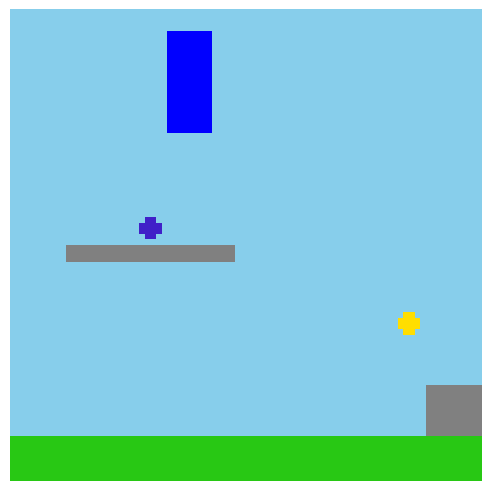

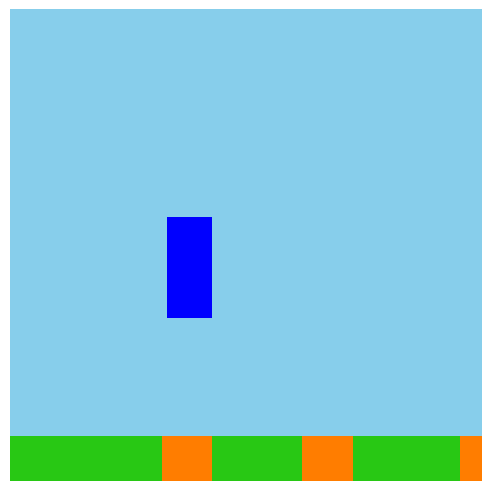

Present | Absent
Concept: random continuous
binary: False
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)
Min: -3.42
Max: 4.02


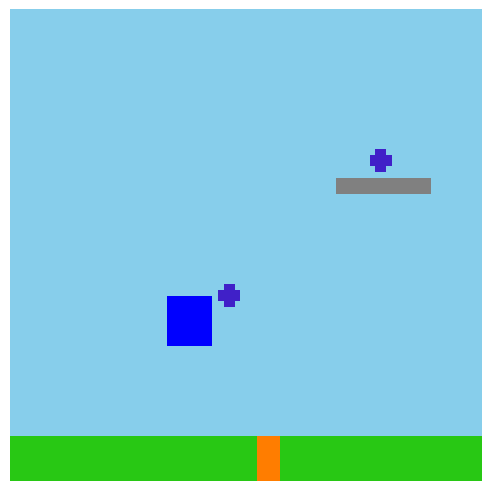

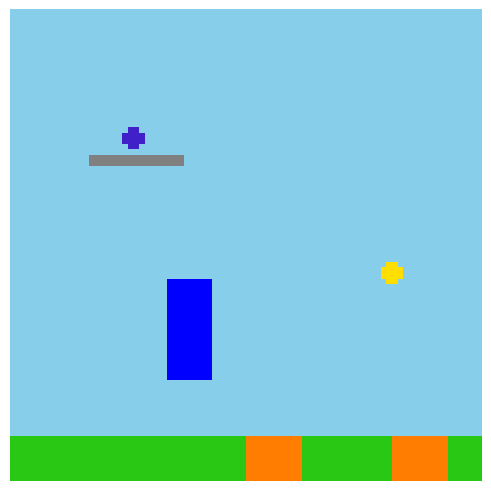

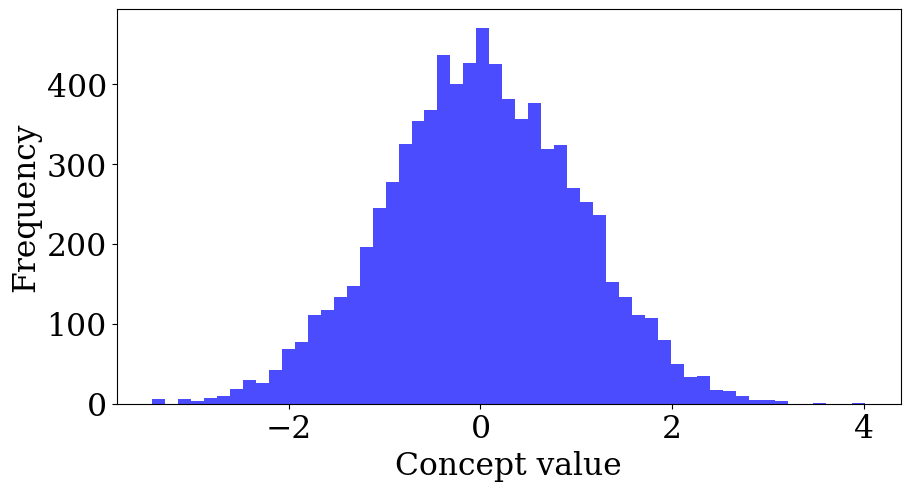

Concept: player on grass
binary: True
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)


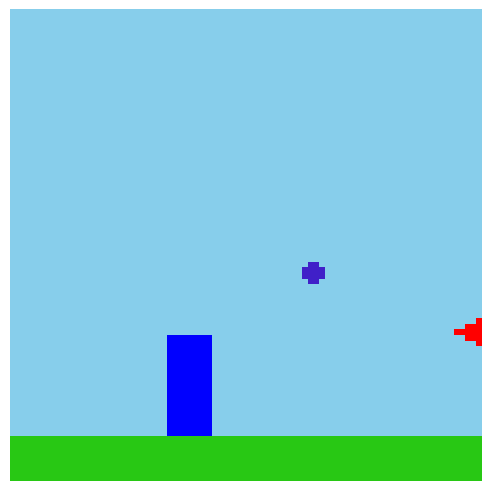

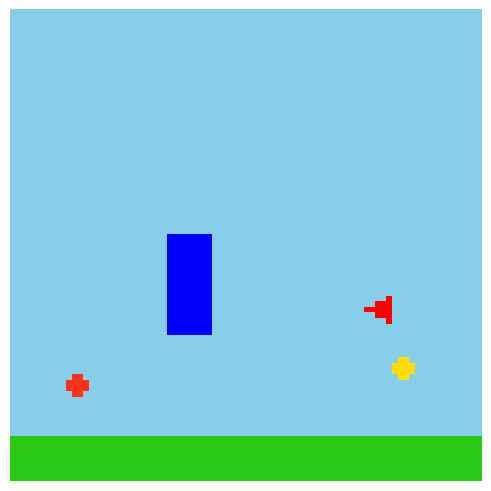

Present | Absent
Concept: player in air
binary: True
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)


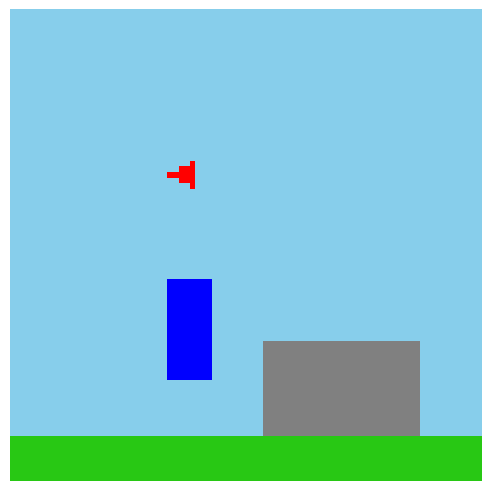

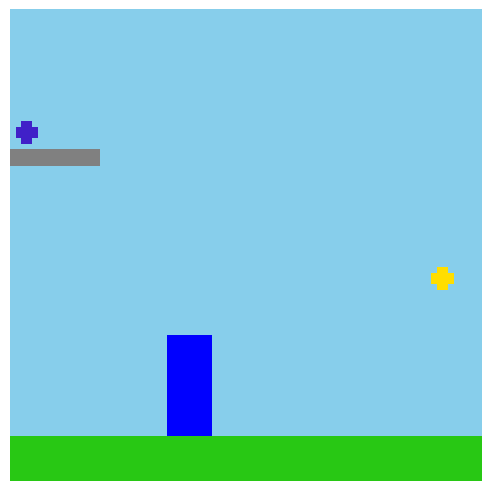

Present | Absent
Concept: player dodging
binary: True
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)


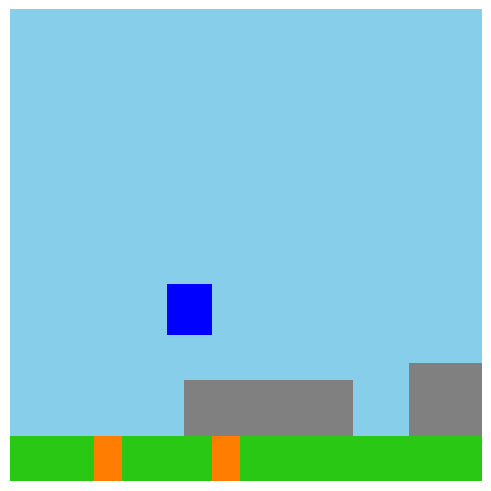

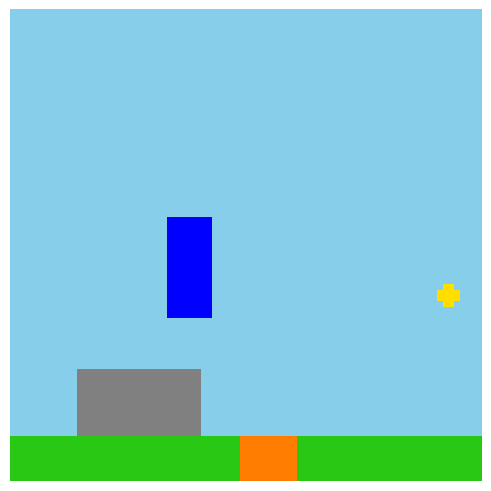

Present | Absent
Concept: player on wall
binary: True
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)


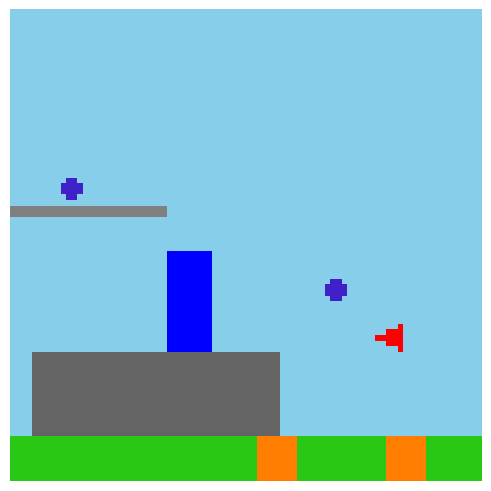

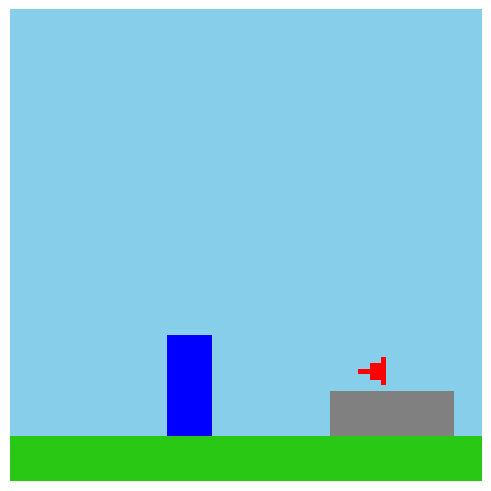

Present | Absent
Concept: player dodging on wall
binary: True
train: (2858, 84, 84, 3) (2858,)
test: (714, 84, 84, 3) (714,)


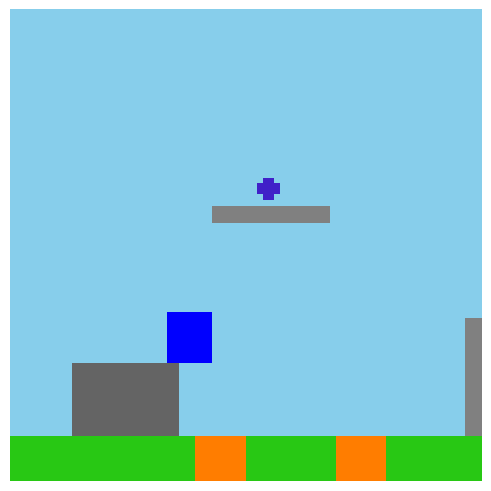

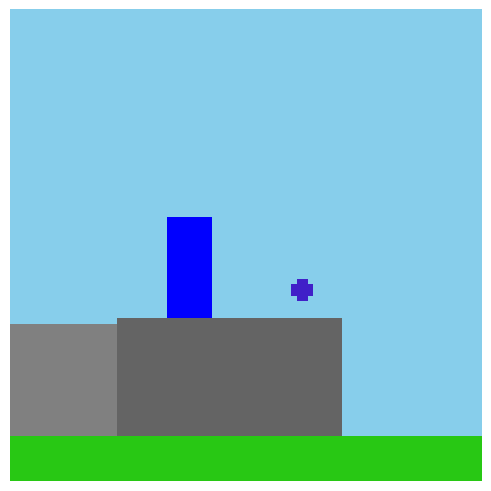

Present | Absent
Concept: bullet aligned with player
binary: True
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)


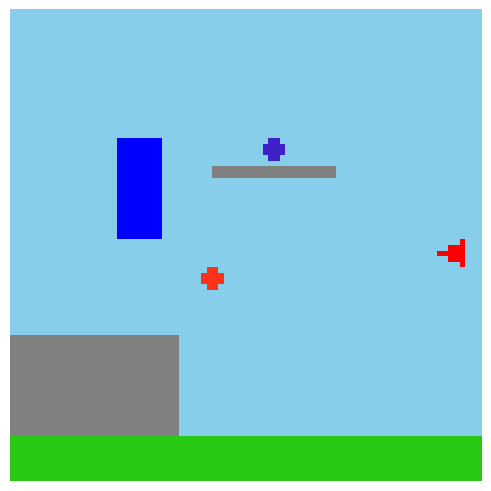

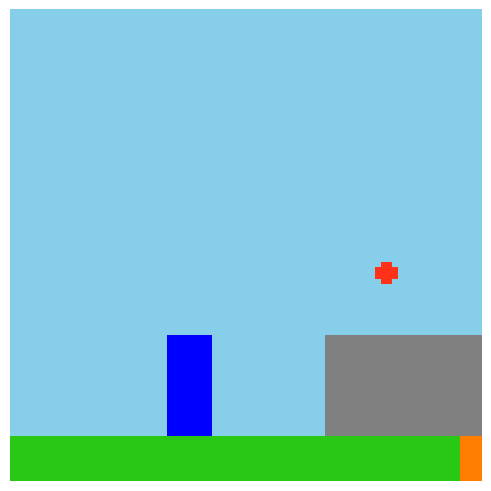

Present | Absent
Concept: good coin left of player
binary: True
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)


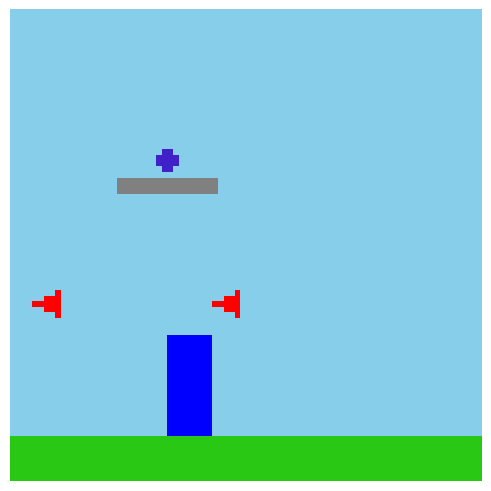

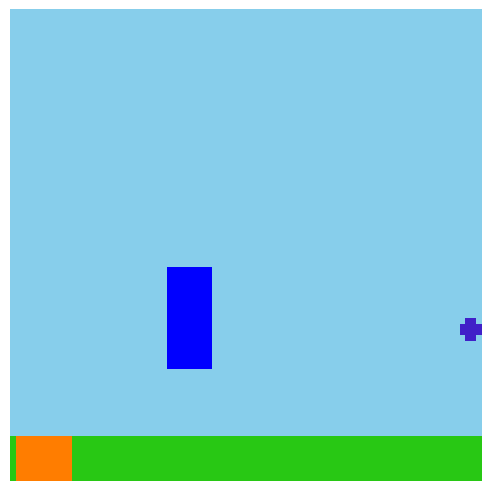

Present | Absent
Concept: bullet close
binary: False
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)
Min: 0
Max: 79.39


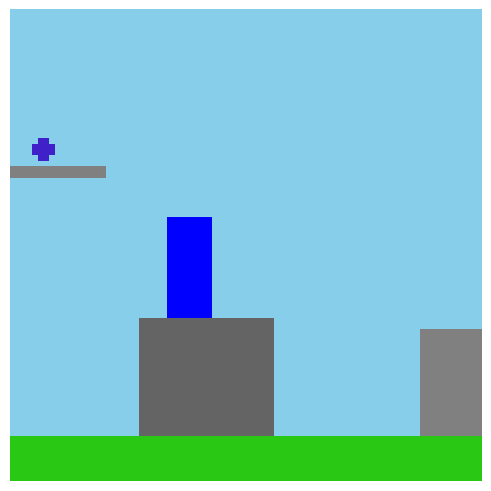

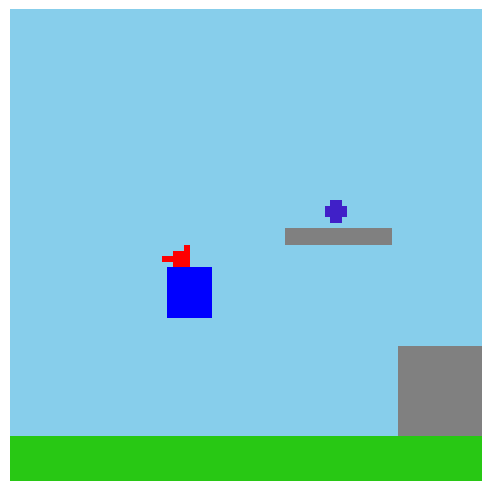

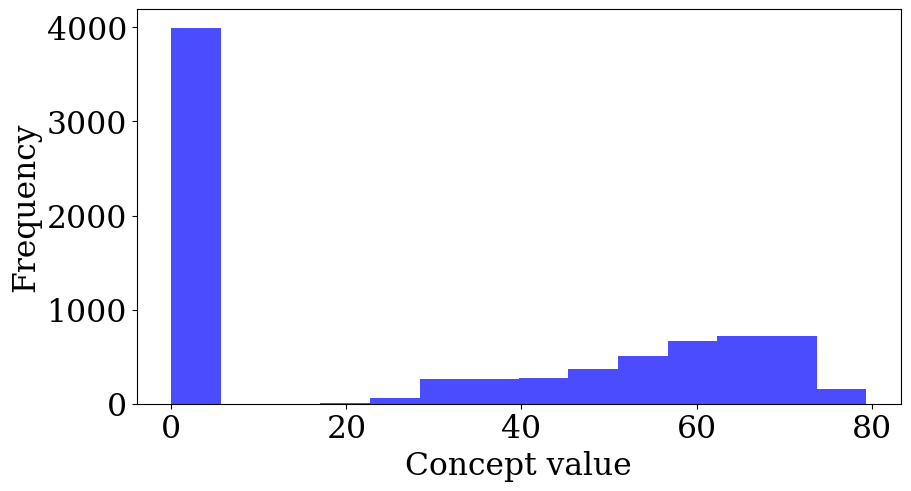

Concept: total wall area
binary: False
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)
Min: 0
Max: 2590


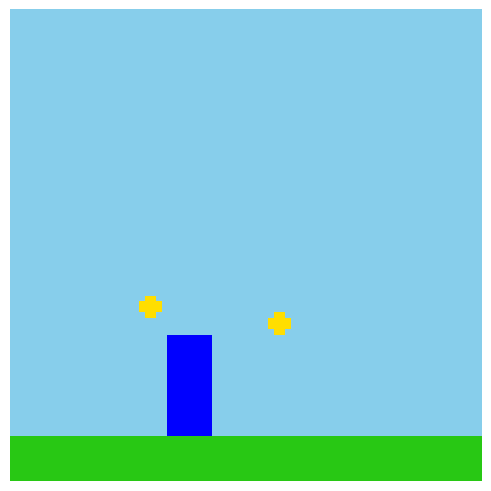

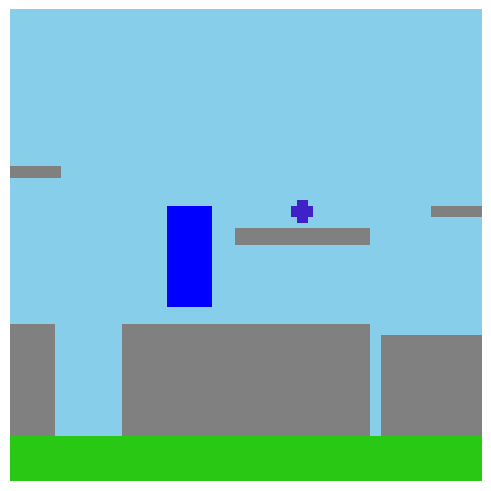

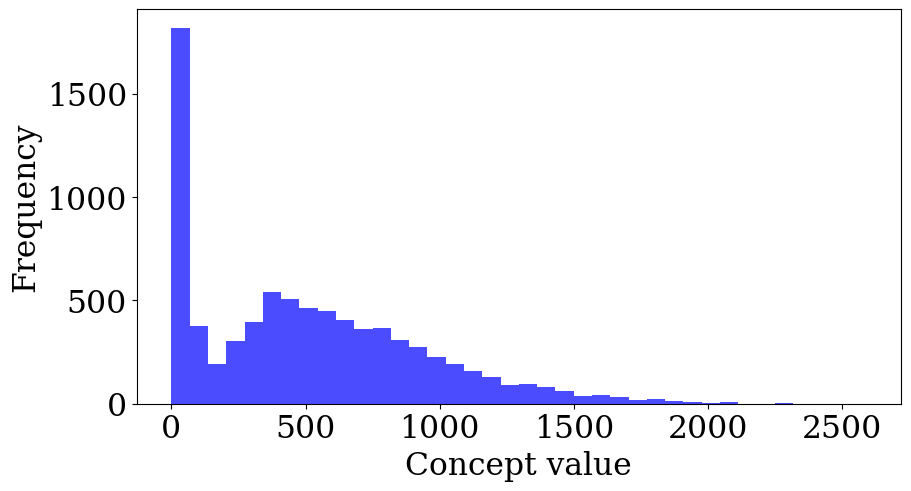

Concept: events quantity
binary: False
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)
Min: 0
Max: 12


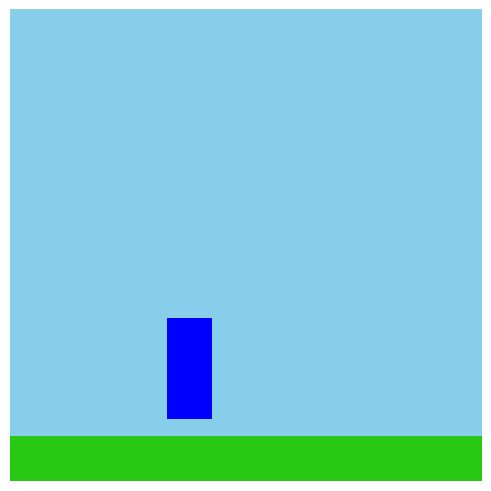

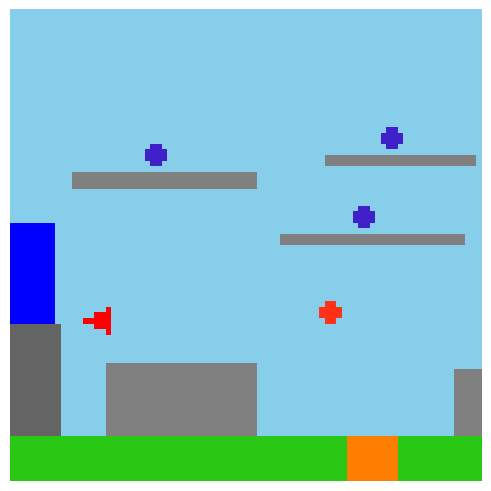

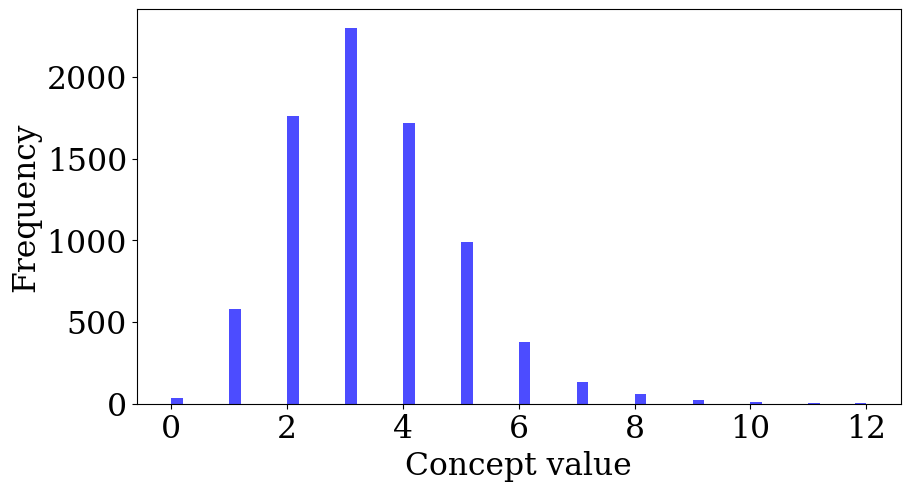

Concept: good events quantity
binary: False
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)
Min: 0
Max: 5


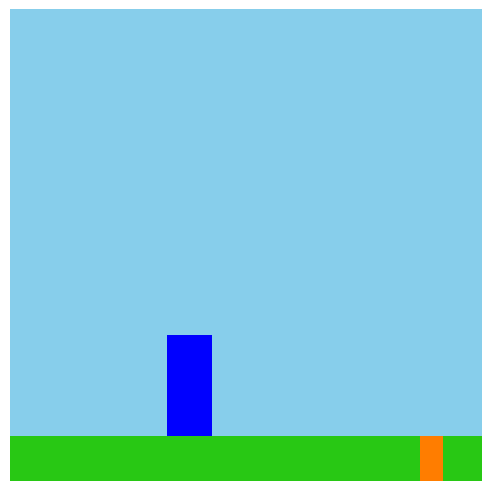

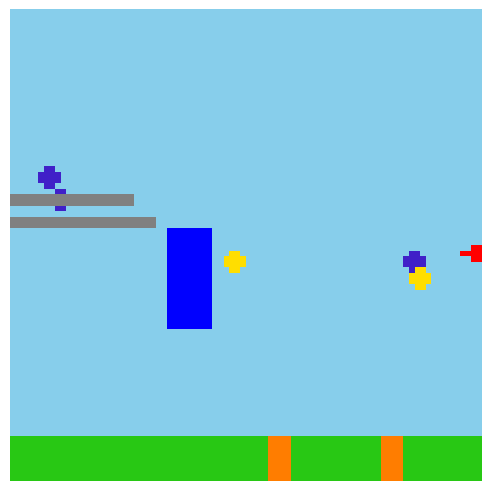

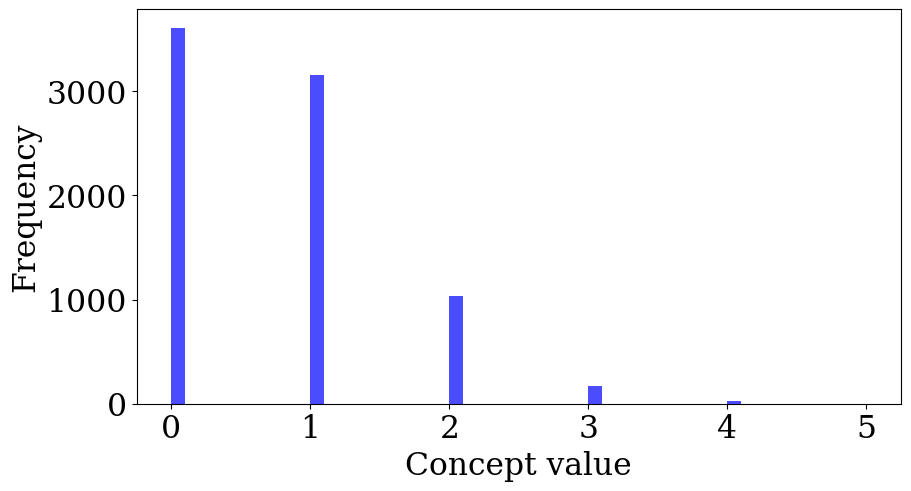

Concept: bad events quantity
binary: False
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)
Min: 0
Max: 7


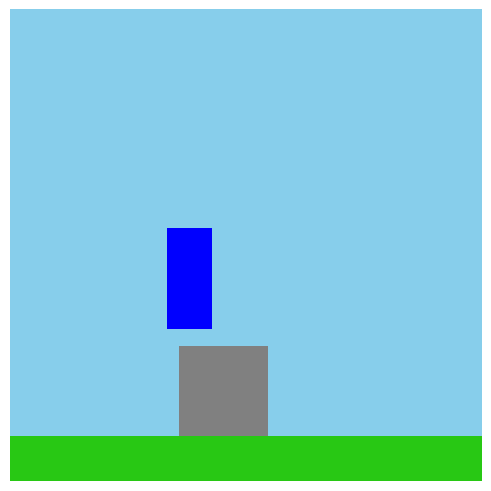

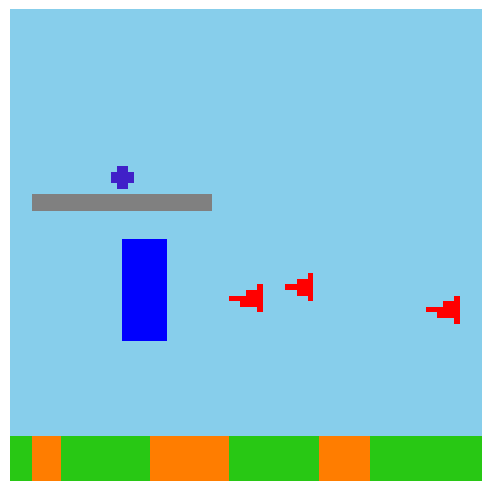

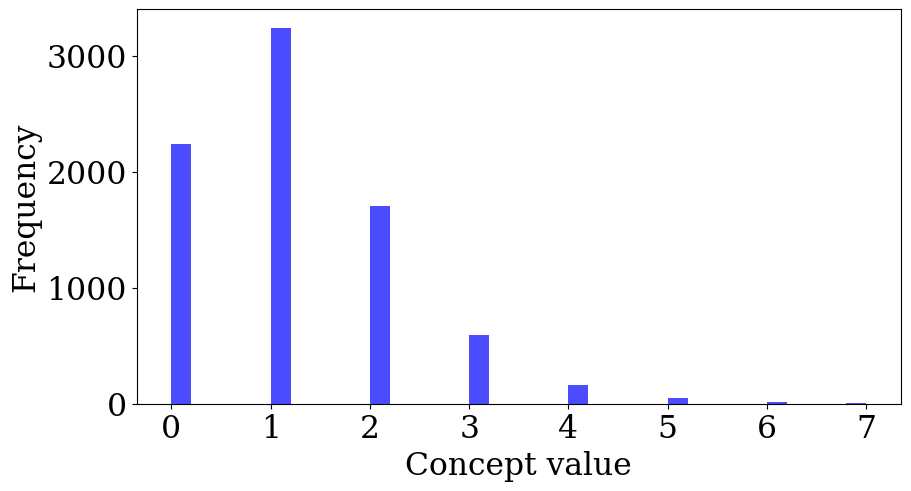

Concept: visible wall
binary: True
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)


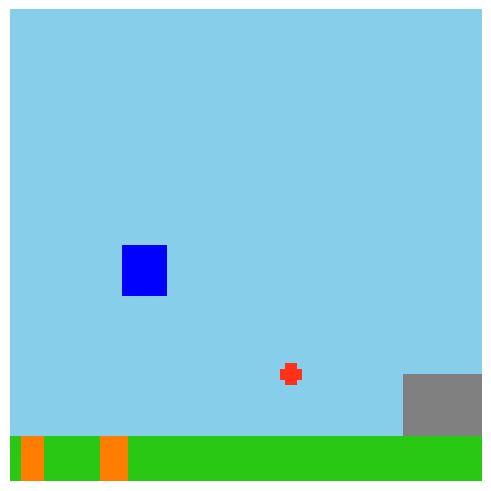

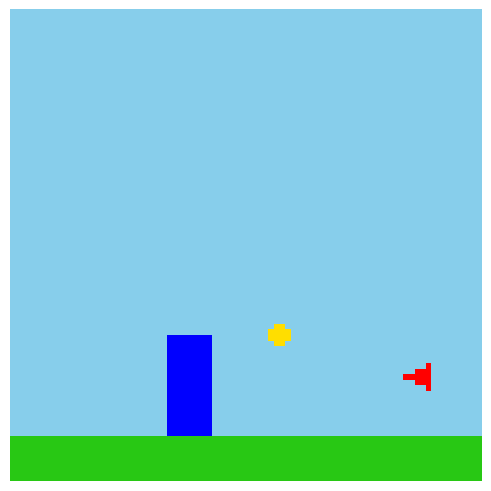

Present | Absent
Concept: visible air wall
binary: True
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)


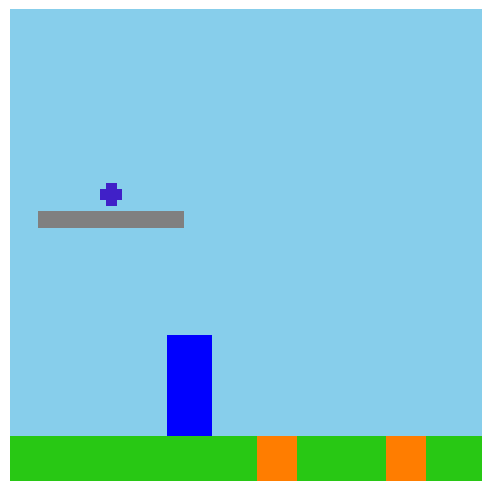

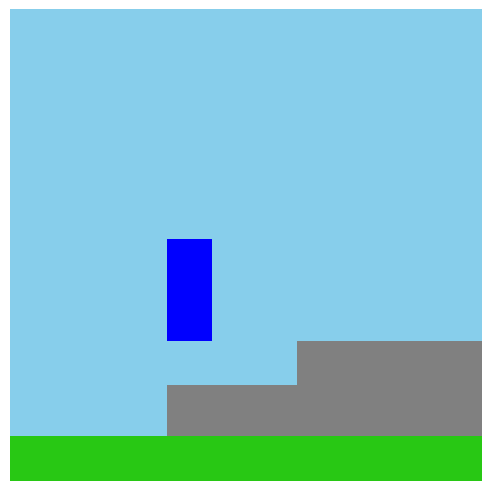

Present | Absent
Concept: visible bullet
binary: True
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)


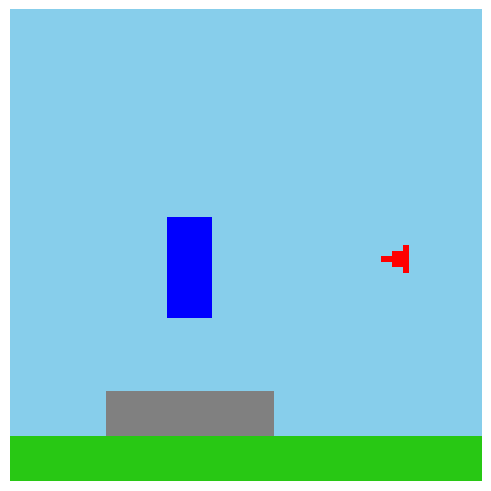

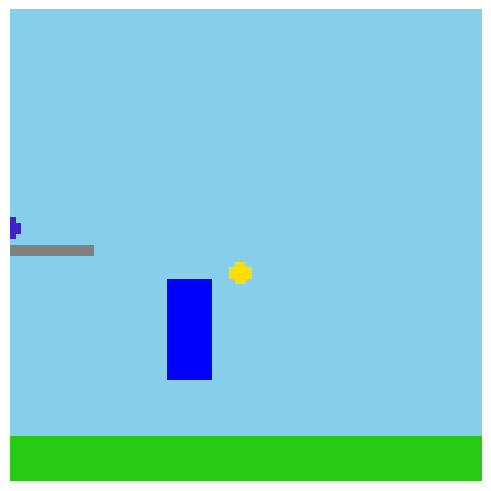

Present | Absent
Concept: visible lava
binary: True
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)


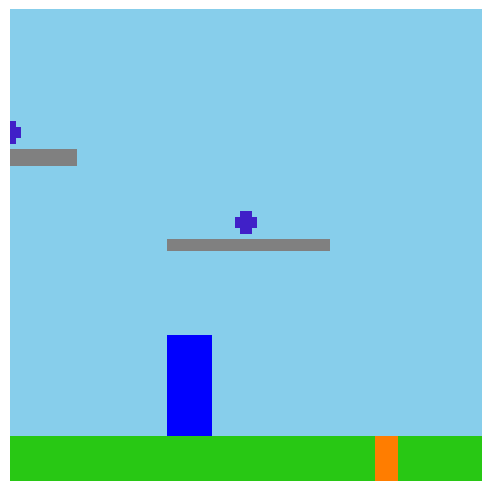

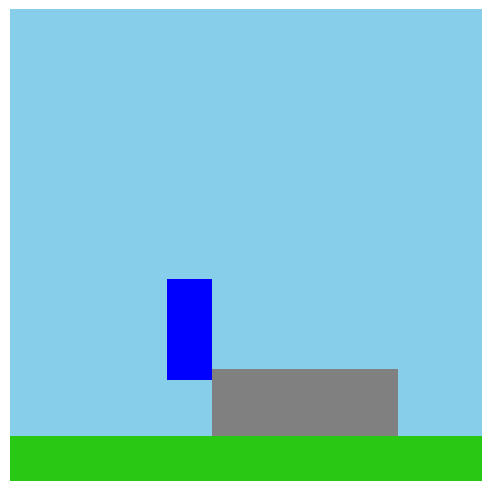

Present | Absent
Concept: visible blue coin
binary: True
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)


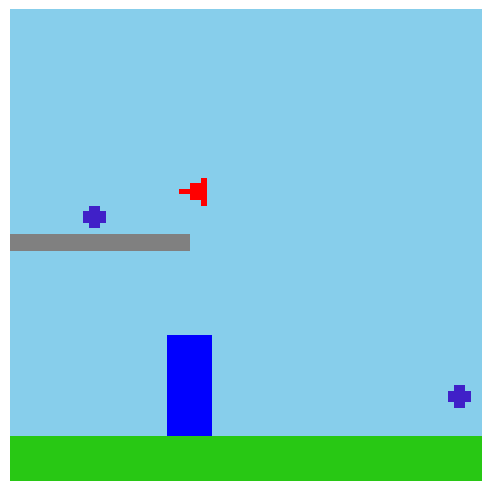

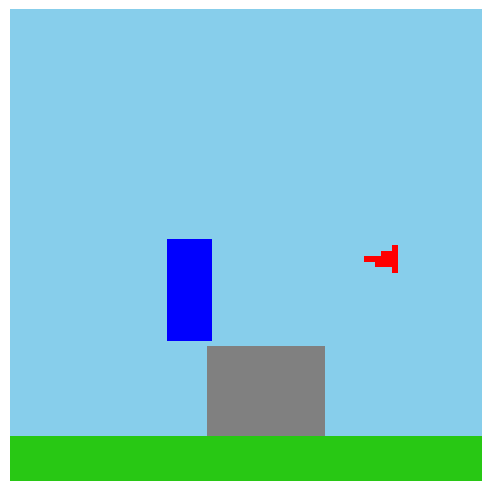

Present | Absent
Concept: visible gold coin
binary: True
train: (5746, 84, 84, 3) (5746,)
test: (1436, 84, 84, 3) (1436,)


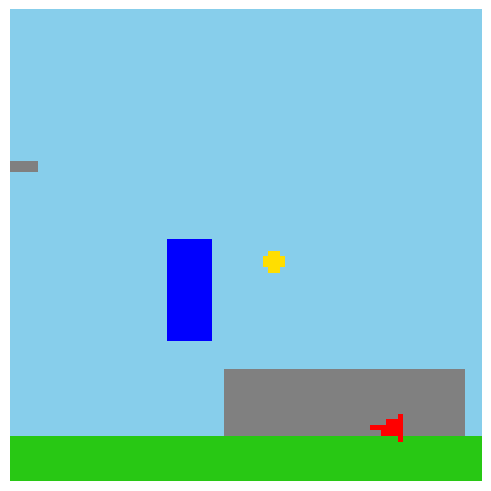

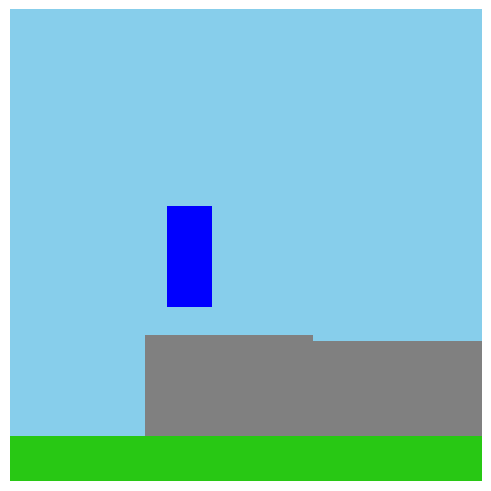

Present | Absent
Concept: visible red coin
binary: True
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)


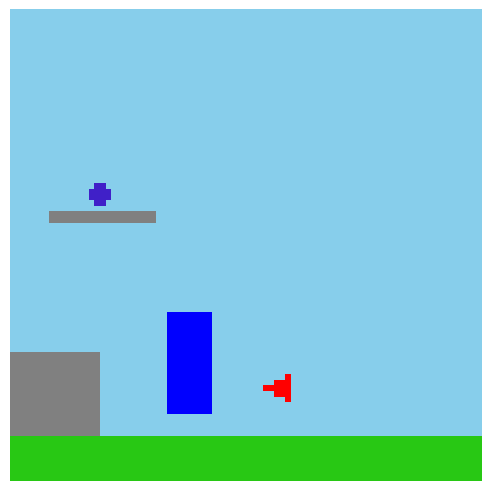

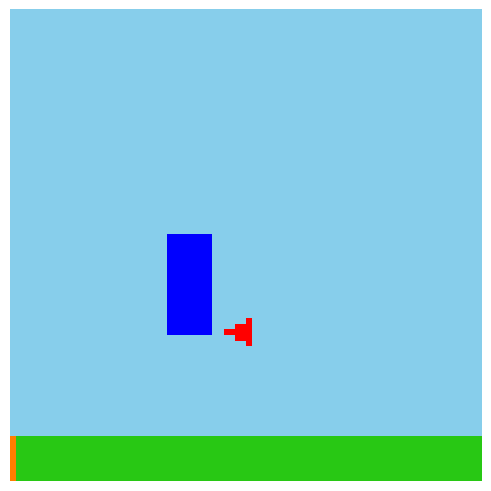

Present | Absent
Concept: visible high coin
binary: True
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)


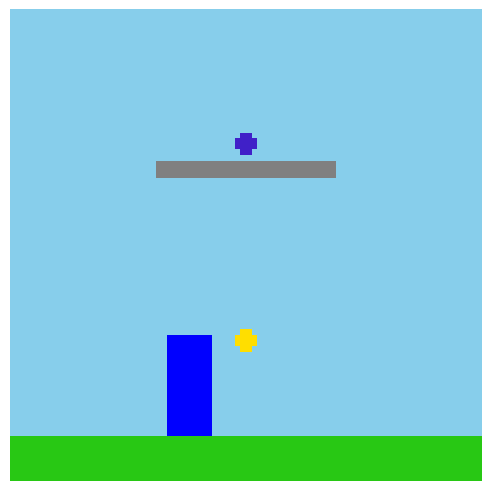

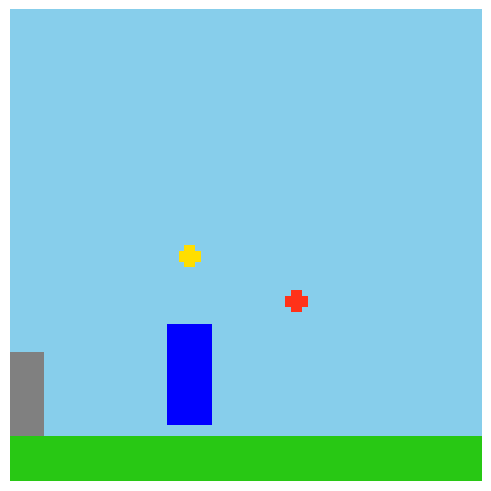

Present | Absent
Concept: visible good low coin
binary: True
train: (8000, 84, 84, 3) (8000,)
test: (2000, 84, 84, 3) (2000,)


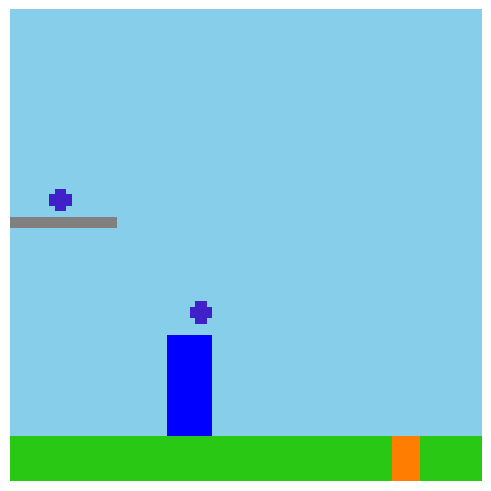

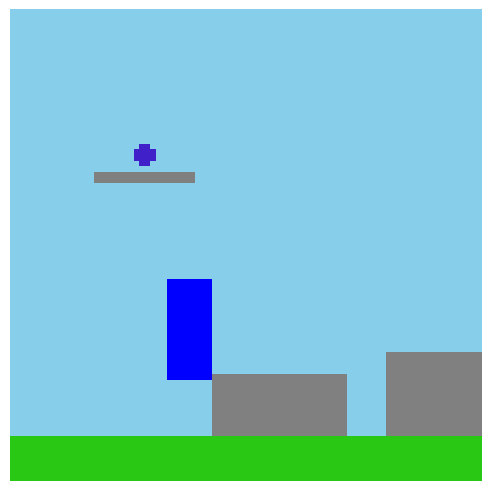

Present | Absent


In [4]:
def save_example(image, save_name):
    plt.figure(figsize=set_size_and_get_figsize(2))
    plt.imshow(image)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(save_name, bbox_inches='tight')
    plt.show()

# For each concept show: 
# Presence and absence (binary)
# Or minimum and maximum value (non-binary)
for concept_name, concept in concept_instances.items():
    concept.prepare_data(env_steps, max_size=10000, scale=False)
    concept.summary()

    if concept.binary:
        # Binary Concept
        presence_index = np.where(concept.train_values == 1)[0]
        absence_index = np.where(concept.train_values == 0)[0]
        presence_index = np.random.choice(presence_index, 1)
        absence_index = np.random.choice(absence_index, 1)
        presence_images = concept.train_images[presence_index]
        absence_images = concept.train_images[absence_index]

        save_name = f'figures/concept examples/present {concept.name}.png'
        save_example(presence_images[0], save_name)
        
        save_name = f'figures/concept examples/absent {concept.name}.png'
        save_example(absence_images[0], save_name)
        
        print('Present | Absent')
    else:
        # Non-Binary Concept
        min_index = np.argmin(concept.train_values)
        max_index = np.argmax(concept.train_values)
        min_image = concept.train_images[min_index]
        max_image = concept.train_images[max_index]
        min_value = concept.train_values[min_index]
        max_value = concept.train_values[max_index]
        print(f'Min: {min_value:.0f}' if min_value.is_integer() else f'Min: {min_value:.2f}')
        print(f'Max: {max_value:.0f}' if max_value.is_integer() else f'Max: {max_value:.2f}')
        
        save_name = f'figures/concept examples/min {concept.name}.png'
        save_example(min_image, save_name)
        
        save_name = f'figures/concept examples/max {concept.name}.png'
        save_example(max_image, save_name)
        
        # Plot the distribution
        plt.figure(figsize=set_size_and_get_figsize(2))
        plt.hist(concept.train_values, bins='auto', color='blue', alpha=0.7)
        plt.xlabel('Concept value')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.savefig(f'figures/concept examples/distribution {concept.name}.png')
        plt.show()

In [5]:
def plot_examples(concept, n=10):
    indices = np.random.choice(len(concept.train_values), n)
    images = concept.train_images[indices]
    values = concept.train_values[indices]
    
    fig, ax = plt.subplots(1, n, figsize=(4*n, 4))
    for i in range(n):
        ax[i].imshow(images[i])
        ax[i].set_title(f'{values[i]}')
        ax[i].axis('off')
        
    plt.tight_layout()
    plt.show()

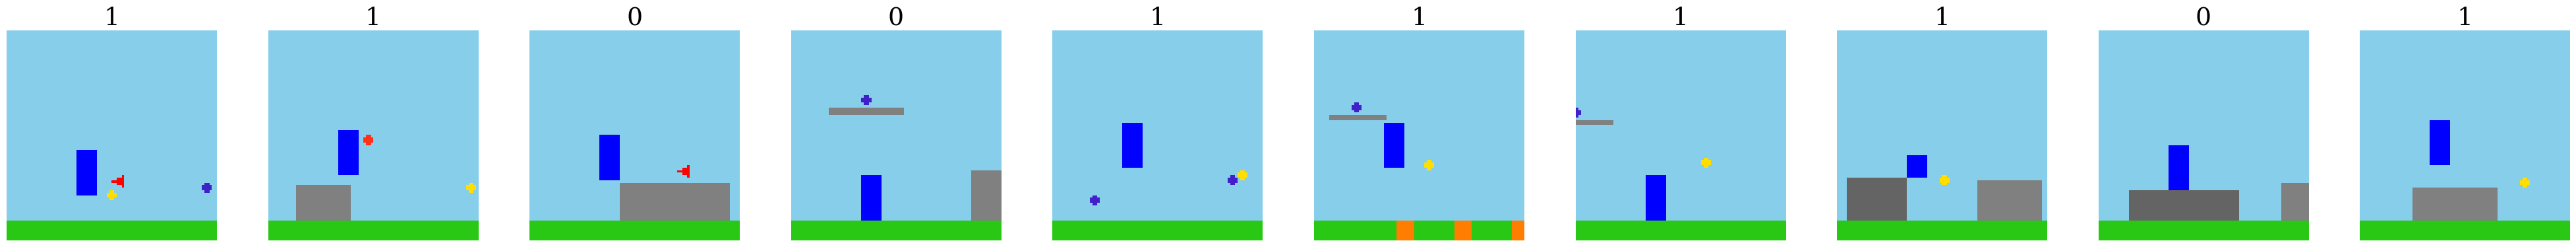

In [6]:
plot_examples(concept_instances['visible gold coin'], n=10)

3830


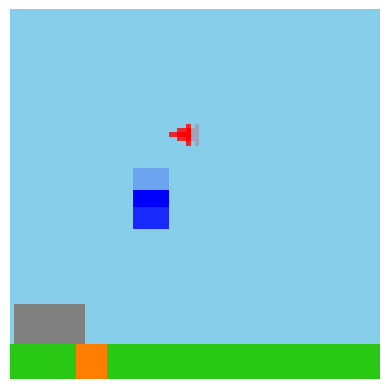

In [7]:
# random image
concept = concept_instances['player in air']
idx = np.random.randint(0, len(concept.train_obs))
print(idx)
plt.imshow(concept.train_obs[idx])
plt.axis('off')
plt.show()

In [8]:
plt.imsave(f'figures/example frame {idx}.png', concept.train_obs[idx])